# Cryptocurrency prices

* **Filename:**  `cryptocurrencies.csv`
* **Description:** Cryptocurrency prices for a handful of coins over time.
* **Source:** https://coinmarketcap.com/all/views/all/ but from a million years ago (I cut and pasted, honestly)

### Make a chart of bitcoin's high, on a weekly basis

You might want to do the cherry blossoms homework first, or at least read the part about `format=` and `pd.to_datetime`.

*Yes, that's the entire assignment. It isn't an exciting dataset, but it's just dirty enough to make charting this a useful experience.*

In [1]:
import pandas as pd

/Users/mahiradayal/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("/Users/mahiradayal/computing/hw-8/cryptocurrency/cryptocurrencies.csv")
df

,date,open,high,low,close,volume,market_cap,coin
0,12-Feb-18,"8,141.43","8,985.92","8,141.43","8,926.57","6,256,440,000","137,258,000,000",BTC
1,11-Feb-18,"8,616.13","8,616.13","7,931.10","8,129.97","6,122,190,000","145,245,000,000",BTC
2,10-Feb-18,"8,720.08","9,122.55","8,295.47","8,621.90","7,780,960,000","146,981,000,000",BTC
3,9-Feb-18,"8,271.84","8,736.98","7,884.71","8,736.98","6,784,820,000","139,412,000,000",BTC
4,8-Feb-18,"7,637.86","8,558.77","7,637.86","8,265.59","9,346,750,000","128,714,000,000",BTC
...,...,...,...,...,...,...,...,...
2260,17-Feb-17,13.07,13.34,13.04,13.3,"1,711,010","182,332,000",XMR
2261,16-Feb-17,13.62,13.62,12.91,13.1,"3,256,190","189,926,000",XMR
2262,15-Feb-17,13.01,13.74,12.88,13.62,"4,811,600","181,497,000",XMR
2263,14-Feb-17,12.2,13.2,12.11,12.99,"4,166,850","170,135,000",XMR


In [3]:
import datetime as dt

In [4]:
df['date'] = pd.to_datetime(df.date, format="%d-%b-%y", errors="coerce").dropna()
df.date

0      2018-02-12
1      2018-02-11
2      2018-02-10
3      2018-02-09
4      2018-02-08
          ...    
2260   2017-02-17
2261   2017-02-16
2262   2017-02-15
2263   2017-02-14
2264   2017-02-13
Name: date, Length: 2265, dtype: datetime64[ns]

In [5]:
df['week'] = df.date.dt.strftime("%W")
df.week.sort_values().head(-5)

766     01
771     01
770     01
769     01
768     01
        ..
1946    52
1945    52
1944    52
1943    52
48      52
Name: week, Length: 2260, dtype: object

In [6]:
df['high']=df['high'].str.replace(',','')
df.high.head()

0    8985.92
1    8616.13
2    9122.55
3    8736.98
4    8558.77
Name: high, dtype: object

In [29]:
df["high"]=df["high"].astype(float)

In [30]:
df.dtypes

date          datetime64[ns]
open                  object
high                 float64
low                   object
close                 object
volume                object
market_cap            object
coin                  object
week                  object
dtype: object

<AxesSubplot:ylabel='week'>

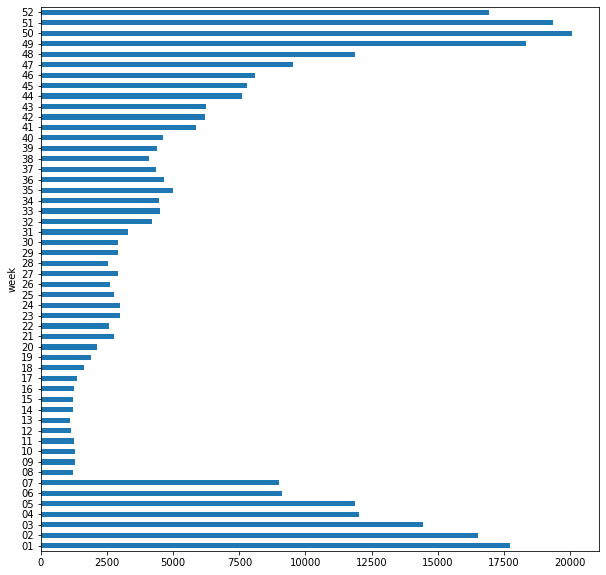

In [31]:
df.groupby('week').high.agg('max').plot(y='week', x ='max', kind='barh', figsize = (10,10))